<a href="https://colab.research.google.com/github/meralemirhan/Students-Performance-Analysis/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum() #eksik veri kontrolü

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


<ipython-input-7-b96cbd2faa86>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x = 'math score', data = df,palette="muted")


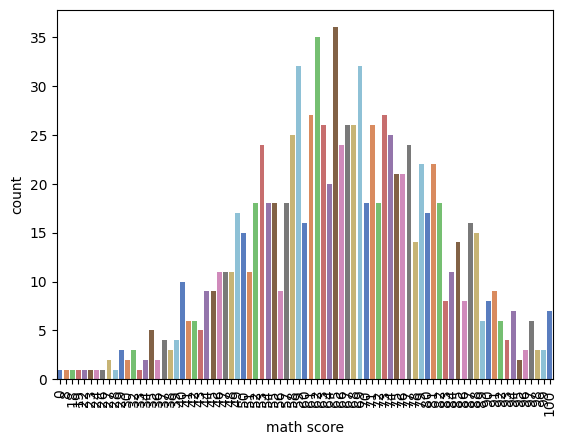

In [7]:
#math skoruna göre sütun grafiği
p = sns.countplot(x = 'math score', data = df,palette="muted")
_=plt.setp(p.get_xticklabels(), rotation=90)

In [9]:
#kaç öğrenci başarılı olmuştur?
passmark = 50
df["Math_PassStatus"]=np.where(df["math score"]<50,"F","T") #F kaldı,T geçti
df.Math_PassStatus.value_counts()


,count
Math_PassStatus,
T,865
F,135


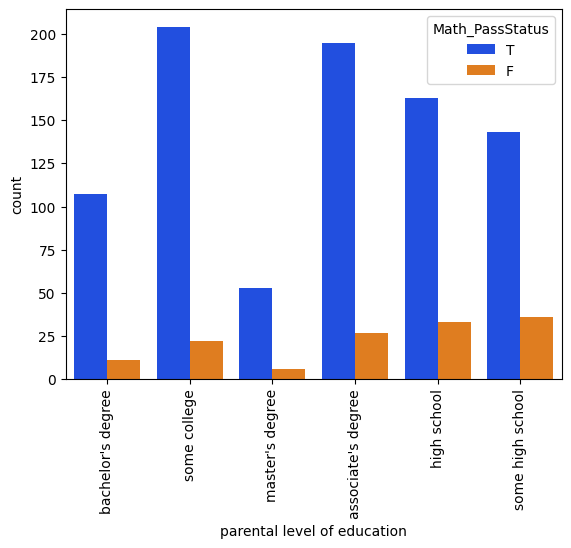

In [10]:
#Ailenin eğitim durumuna göre karşılaştırma
p = sns.countplot(x = 'parental level of education',data=df,hue= "Math_PassStatus",palette="bright")
_=plt.setp(p.get_xticklabels(), rotation=90)

<ipython-input-12-c47a126f8303>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x = 'reading score',data=df,palette="muted")


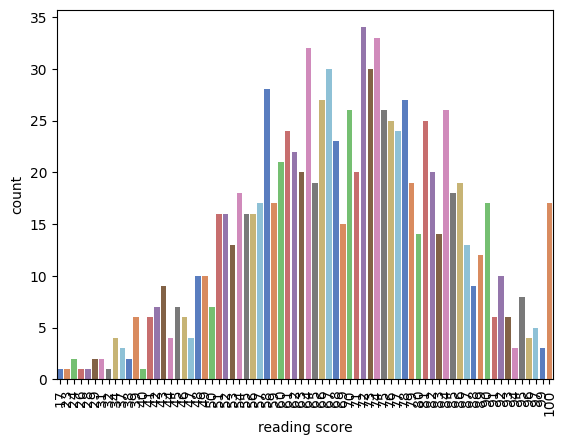

In [12]:
#Okuma puanlarının grafiği
p = sns.countplot(x = 'reading score',data=df,palette="muted")
_=plt.setp(p.get_xticklabels(), rotation=90)

In [13]:
df["Reading_PassStatus"]=np.where(df["reading score"]<50,"F","T") #F kaldı,T geçti
df.Reading_PassStatus.value_counts()

,count
Reading_PassStatus,
T,910
F,90


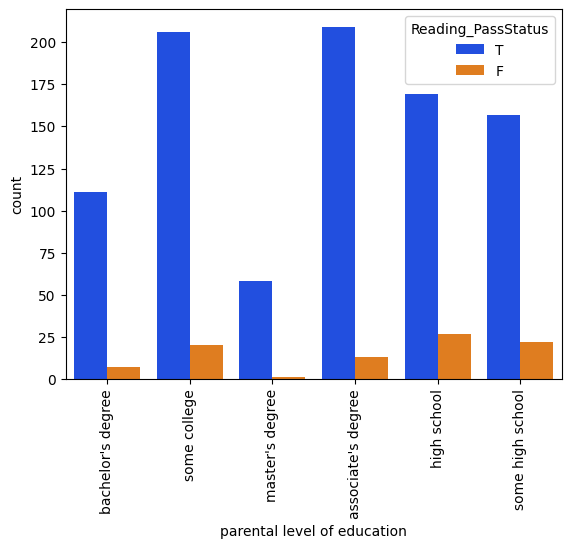

In [14]:
#Ailenin eğitim durumuna göre karşılaştırma
p = sns.countplot(x = 'parental level of education',data=df,hue= "Reading_PassStatus",palette="bright")
_=plt.setp(p.get_xticklabels(), rotation=90)

Okuma ile ilgili yapılan sınavda 910 kişi başarılı, 90 kişi de başarısız olmuştur.


<ipython-input-15-01be5ec08d4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x = 'writing score',data=df,palette="muted")


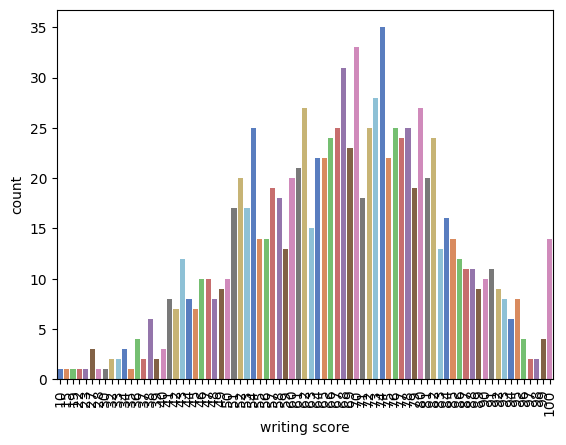

In [15]:
#Yazma puanlarının grafiği
p = sns.countplot(x = 'writing score',data=df,palette="muted")
_=plt.setp(p.get_xticklabels(), rotation=90)

In [16]:
df["Writing_PassStatus"]=np.where(df["writing score"]<50,"F","T") #F kaldı,T geçti
df.Writing_PassStatus.value_counts()

,count
Writing_PassStatus,
T,886
F,114


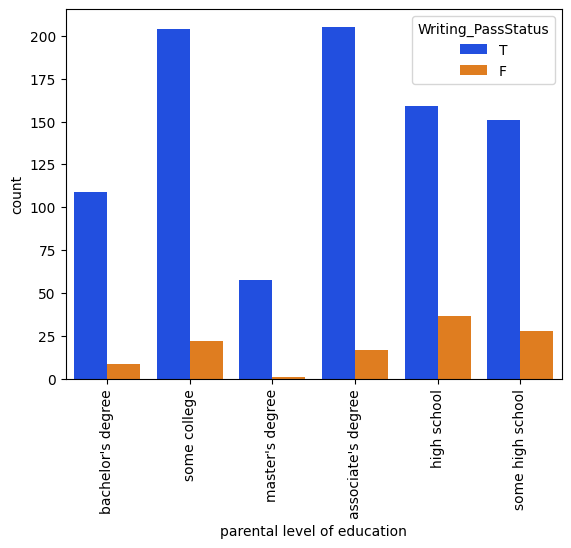

In [17]:
#Ailenin eğitim durumuna göre karşılaştırma
p = sns.countplot(x = 'parental level of education',data=df,hue= "Writing_PassStatus",palette="bright")
_=plt.setp(p.get_xticklabels(), rotation=90)

In [18]:
df["OverAll_PassStatus"]= df.apply(lambda x: "F" if x["Math_PassStatus"] == "F" or x["Reading_PassStatus"] == "F" or x["Writing_PassStatus"] == "F" else "T",axis=1)
df.OverAll_PassStatus.value_counts()


,count
OverAll_PassStatus,
T,812
F,188


Tüm derslerden geçip geçmediğine bakacak. Ebeveynlerin eğitim durumlarına göre de incelenecek.

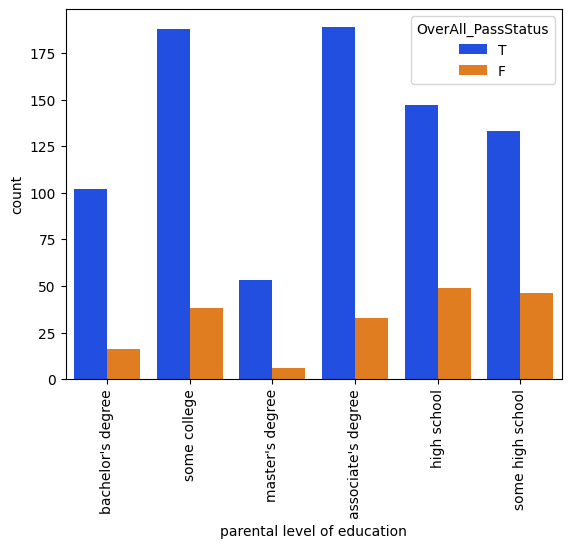

In [19]:
p = sns.countplot(x = 'parental level of education',data=df,hue= "OverAll_PassStatus",palette="bright")
_=plt.setp(p.get_xticklabels(), rotation=90)

In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,T,T,T,T
1,female,group C,some college,standard,completed,69,90,88,T,T,T,T
2,female,group B,master's degree,standard,none,90,95,93,T,T,T,T
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,T,F,F
4,male,group C,some college,standard,none,76,78,75,T,T,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,T,T,T,T
996,male,group C,high school,free/reduced,none,62,55,55,T,T,T,T
997,female,group C,high school,free/reduced,completed,59,71,65,T,T,T,T
998,female,group D,some college,standard,completed,68,78,77,T,T,T,T


In [21]:
df["Total_Makrs"] = df["math score"] + df["reading score"] + df["writing score"]

Üç notun toplamı

In [22]:
df["Percentage"] = df["Total_Makrs"]/3

Üç notun ortalaması

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Makrs,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,T,T,T,T,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,T,T,T,T,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,T,T,T,T,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,T,F,F,148,49.333333
4,male,group C,some college,standard,none,76,78,75,T,T,T,T,229,76.333333


<ipython-input-24-3b2f5f7ade74>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p =sns.countplot(x = 'Percentage',data=df,palette="muted")


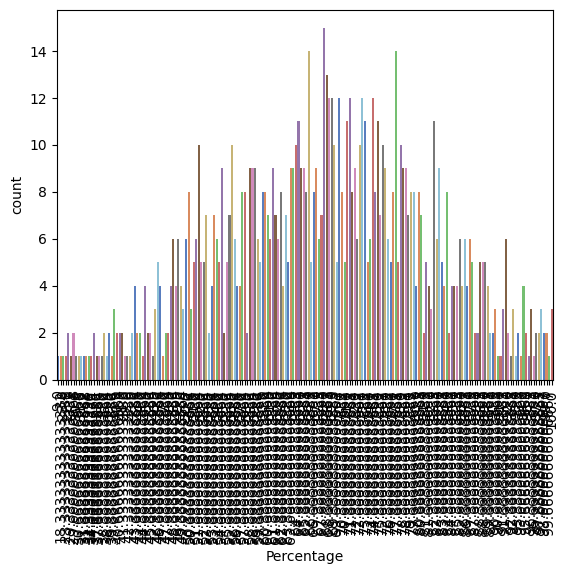

In [24]:
p =sns.countplot(x = 'Percentage',data=df,palette="muted")
_=plt.setp(p.get_xticklabels(), rotation=90)

In [25]:
def GetGrade(Percentage, OverAll_PassStatus):
    if OverAll_PassStatus == "F":
        return "F"
    if Percentage >= 80:
        return "A"
    if Percentage >= 70:
        return "B"
    if Percentage >= 60:
        return "C"
    if Percentage >= 50:
        return "D"
    if Percentage >= 40:
        return "E"
    else:
        return 'F'
df['Grade'] = df.apply(lambda x: GetGrade(x["Percentage"],x["OverAll_PassStatus"]),axis=1)
df.Grade.value_counts()

,count
Grade,
B,261
C,255
A,198
F,188
D,98


<ipython-input-26-31ac1d5b6d95>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Grade',data=df,order=["A","B","C","D","E","F"],palette="muted")


<Axes: xlabel='Grade', ylabel='count'>

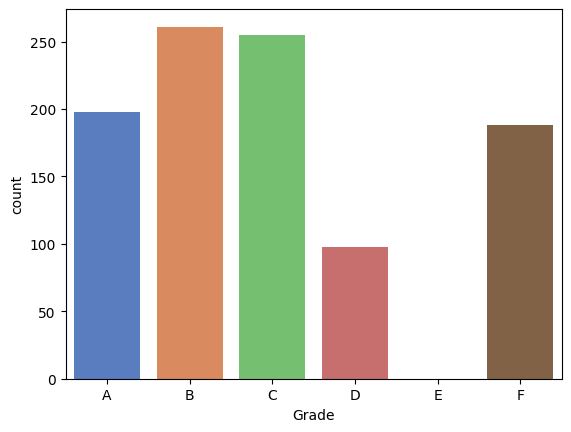

In [26]:
sns.countplot(x = 'Grade',data=df,order=["A","B","C","D","E","F"],palette="muted")

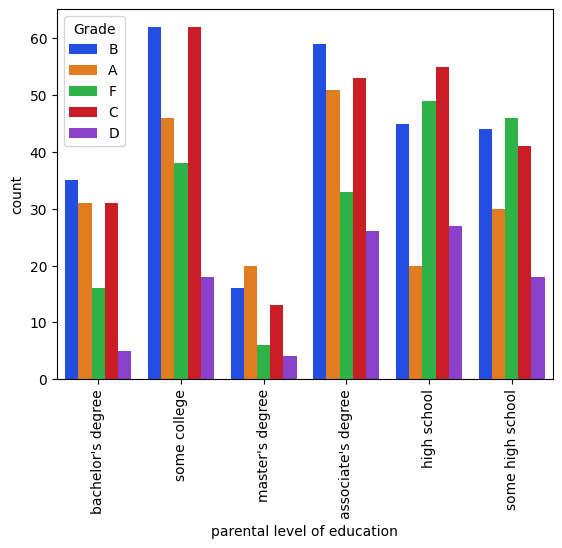

In [27]:
p = sns.countplot(x = 'parental level of education',data=df,hue= "Grade",palette="bright")
_=plt.setp(p.get_xticklabels(), rotation=90)

In [28]:
df_gender = df["gender"]
female_count = df_gender.value_counts()["female"]
male_count = df_gender.value_counts()["male"]
print(female_count)
print(male_count)

518
482


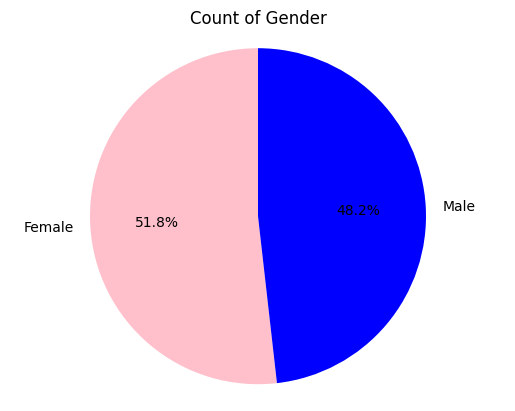

In [29]:
labels = ['Female', 'Male']
sizes = [female_count, male_count]
colors = ['pink', 'blue']
plt.pie(sizes,labels=labels,colors=colors,autopct= "%1.1f%%",startangle=90)
plt.axis('equal')
plt.title('Count of Gender')
plt.show()

In [30]:
#Cinsiyetlere göre Mat dersindeki başarıları
df_female = df[df["gender"] == "female"]
df_male = df[df["gender"] == "male"]
female_math_mean = df_female["math score"].mean()
male_math_mean = df_male["math score"].mean()
female_to_male_math_ratio = female_math_mean/male_math_mean
print("kızların erkeklere oranı",female_to_male_math_ratio)
print(female_math_mean)
print(male_math_mean)

kızların erkeklere oranı 0.9258672573189434
63.633204633204635
68.72821576763485


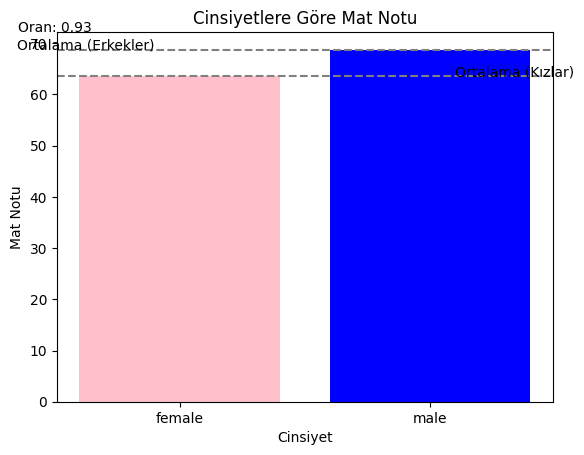

In [31]:
labels = ["female","male"]
values = [female_math_mean,male_math_mean]
colors = ["pink","blue"]
plt.bar(labels,values,color=colors)

plt.axhline(y=male_math_mean,color="gray",linestyle='--')
plt.text(-0.1,male_math_mean,"Ortalama (Erkekler)",ha = "right")
plt.axhline(y=female_math_mean,color="gray",linestyle='--')
plt.text(1.1,female_math_mean,"Ortalama (Kızlar)",ha = "left")
plt.text(-0.5,male_math_mean*1.05,"Oran: {:.2f}".format(female_to_male_math_ratio),ha="center")

plt.xlabel("Cinsiyet")
plt.ylabel("Mat Notu")
plt.title("Cinsiyetlere Göre Mat Notu")

plt.show()

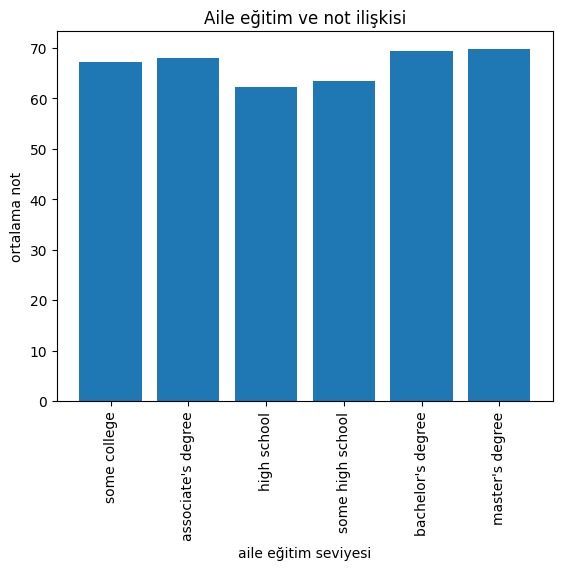

In [34]:
parental_edu_counts = df["parental level of education"].value_counts()

parental_edu_levels = parental_edu_counts.index.tolist()

math_scores = []
for level in parental_edu_levels:
    math_scores.append(df[df["parental level of education"]==level]["math score"].mean())

plt.bar(parental_edu_levels,math_scores)
plt.xlabel("aile eğitim seviyesi")
plt.ylabel("ortalama not")
plt.title("Aile eğitim ve not ilişkisi")
plt.xticks(rotation=90)
plt.show()


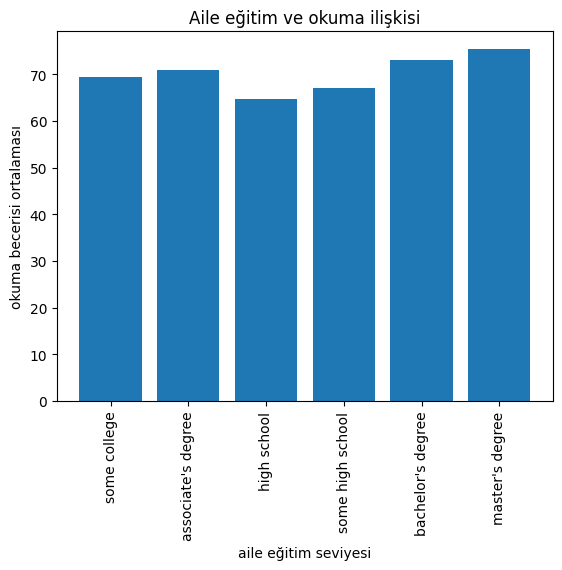

In [38]:
parental_edu_counts = df["parental level of education"].value_counts()

parental_edu_levels = parental_edu_counts.index.tolist()

reading_scores = []
for level in parental_edu_levels:
    reading_scores.append(df[df["parental level of education"]==level]["reading score"].mean())

plt.bar(parental_edu_levels,reading_scores)
plt.xlabel("aile eğitim seviyesi")
plt.ylabel("okuma becerisi ortalaması")
plt.title("Aile eğitim ve okuma ilişkisi")
plt.xticks(rotation=90)
plt.show()


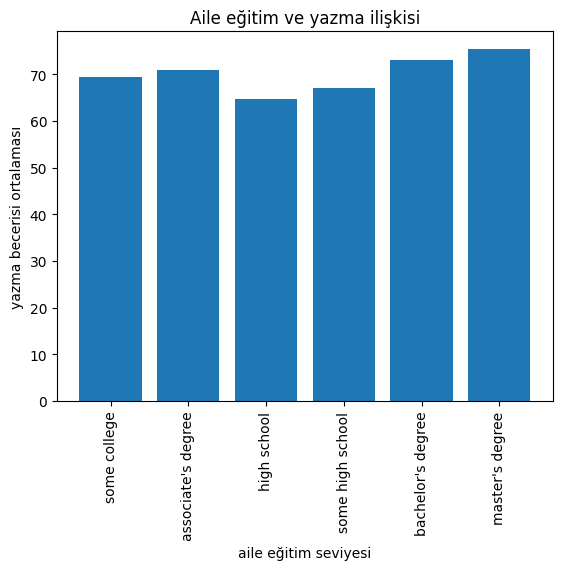

In [41]:
parental_edu_counts = df["parental level of education"].value_counts()

parental_edu_levels = parental_edu_counts.index.tolist()

writing_scores = []
for level in parental_edu_levels:
    writing_scores.append(df[df["parental level of education"]==level]["writing score"].mean())

plt.bar(parental_edu_levels,reading_scores)
plt.xlabel("aile eğitim seviyesi")
plt.ylabel("yazma becerisi ortalaması")
plt.title("Aile eğitim ve yazma ilişkisi")
plt.xticks(rotation=90)
plt.show()


In [42]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Makrs,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,T,T,T,T,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,T,T,T,T,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,T,T,T,T,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,T,F,F,148,49.333333,F
4,male,group C,some college,standard,none,76,78,75,T,T,T,T,229,76.333333,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,T,T,T,T,282,94.000000,A
996,male,group C,high school,free/reduced,none,62,55,55,T,T,T,T,172,57.333333,D
997,female,group C,high school,free/reduced,completed,59,71,65,T,T,T,T,195,65.000000,C
998,female,group D,some college,standard,completed,68,78,77,T,T,T,T,223,74.333333,B


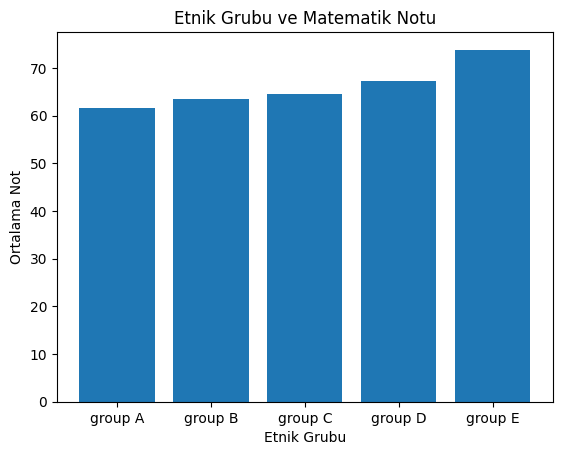

In [44]:
#etnik kökenlerin matematik notuna etkisi
ethnic = df.groupby("race/ethnicity")["math score"].mean().reset_index()
plt.bar(ethnic["race/ethnicity"],ethnic["math score"])
plt.xlabel("Etnik Grubu")
plt.ylabel("Ortalama Not")
plt.title("Etnik Grubu ve Matematik Notu")
plt.show()

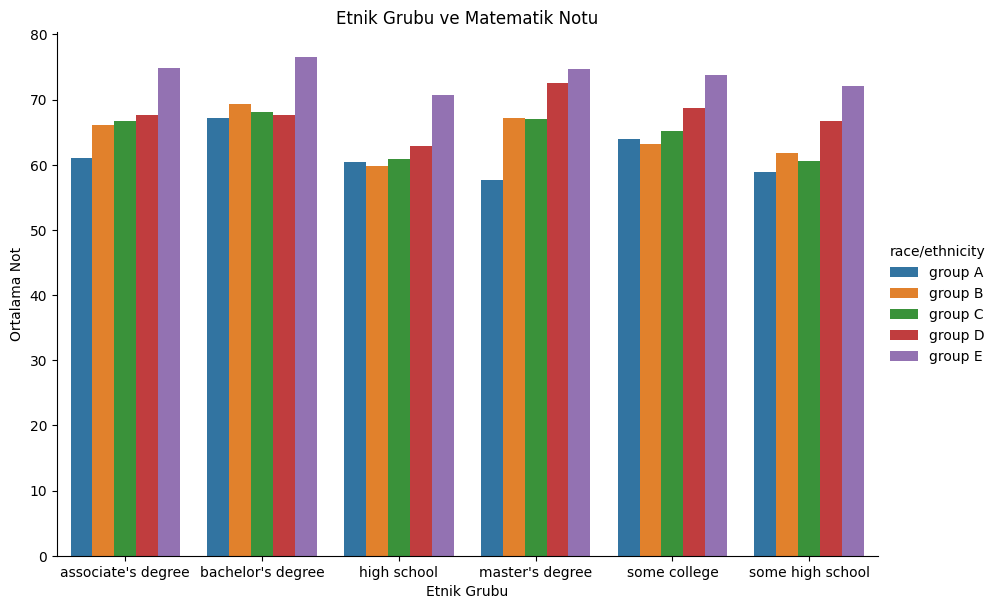

In [47]:
#etnik kökenlerin matematik notuna etkisi
ethnic = df.groupby(["race/ethnicity","parental level of education"])["math score"].mean().reset_index()

sns.catplot(x="parental level of education",y="math score",hue="race/ethnicity",data=ethnic,kind="bar",height=6,aspect=1.5)
plt.xlabel("Etnik Grubu")
plt.ylabel("Ortalama Not")
plt.title("Etnik Grubu ve Matematik Notu")
plt.show()

Text(0, 0.5, 'Ortalama Mat Notu')

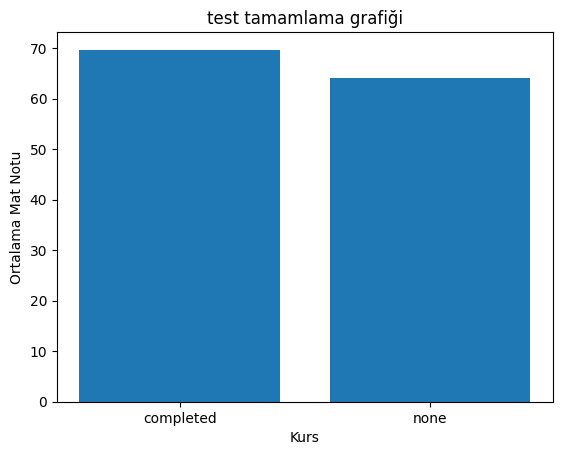

In [50]:
#kursa gitme durumunun mat notu ile ilişkisi

group = df.groupby("test preparation course")["math score"].mean().reset_index()
plt.title("test tamamlama grafiği")
plt.bar(group["test preparation course"],group["math score"])
plt.xlabel("Kurs")
plt.ylabel("Ortalama Mat Notu")

Text(0, 0.5, 'Ortalama Mat Notu')

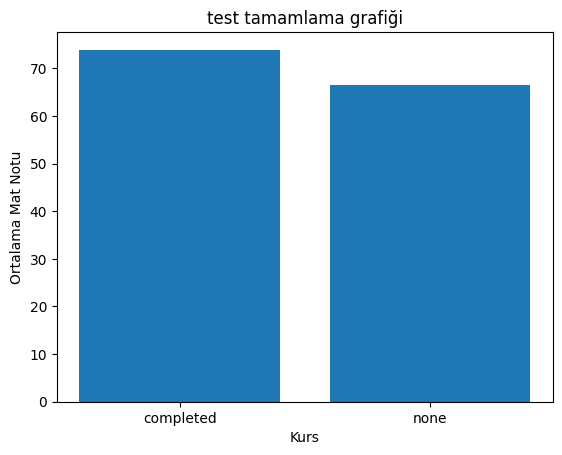

In [51]:
#kursa gitme durumunun yazma becerisi ile ilişkisi

group = df.groupby("test preparation course")["reading score"].mean().reset_index()
plt.title("test tamamlama grafiği")
plt.bar(group["test preparation course"],group["reading score"])
plt.xlabel("Kurs")
plt.ylabel("yazma becerisi")